# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 3</center></span>

### Exercise 03.1 - Plain vanilla option pricing

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1=\mu$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>.As usual, in computing statistical uncertainties, use data blocking.

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


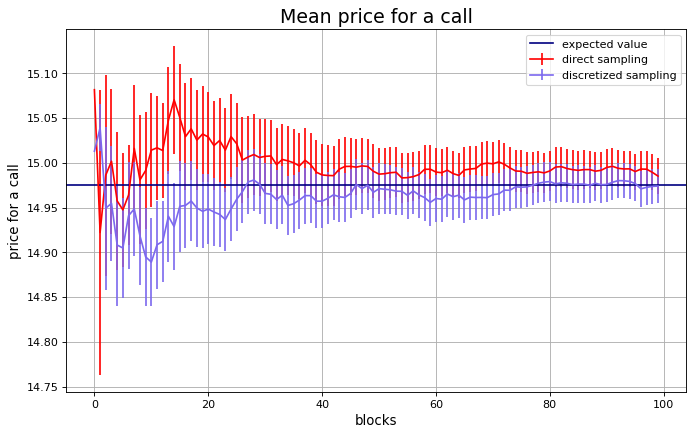

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

M=1000000              # Total number of throws
N=100                  # Number of blocks
L=int(M/N)             # Number of throws in each block

call_mean, call_var = np.loadtxt("Direct_call.csv", unpack=True, usecols=(0,1), delimiter=",")
call_prog_mean, call_prog_var = np.loadtxt("Progressive_call.csv", unpack=True, usecols=(0,1), delimiter=",")
x = np.arange(N)

figure(figsize=(10,6), dpi=80)
plt.errorbar(x,call_mean,yerr=call_var, color="red", label="direct sampling")
plt.errorbar(x,call_prog_mean,yerr=call_prog_var, color="mediumslateblue", label="discretized sampling")
plt.xlabel('blocks', fontsize = 12)
plt.ylabel('price for a call', fontsize = 12)
plt.title('Mean price for a call', fontsize = 17)
plt.axhline(call, color ="navy", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

Il grafico mostra la stima progressiva del prezzo per una call di un'opzione europea. Le stime sono ottenute utilizzando il metodo di data blocking e in totale sono state eseguite $10^6$ simulazioni divise in $100$ blocchi. Il metodo ha permesso anche la stima dell'incertezza. Il valore di aspettazione utilizzato è calcolato dalla soluzione analitica di Black-Scholes.

Il prezzo della call è stato calcolato in due modi: in maniera diretta (rosso) e in maniera discretizzata (viola).<br> Nel metodo diretto il prezzo di mercato viene campionato direttamente al tempo T per ogni simulazione poichè è nota la distribuzione finale dei prezzi (GBM). <br> Nel secondo caso il prezzo al tempo T per ogni simulazione è stato calcolato dividendo l'intervallo di tempo in $100$ step e simulando un moto brawniano geometrico discretizzato negli step.<br> Entrambi i metodi convergono al valore aspettato. 

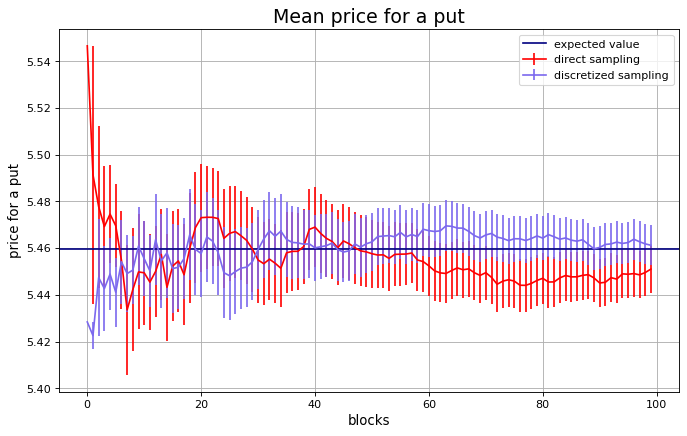

In [3]:
put_mean, put_var = np.loadtxt("Direct_put.csv", unpack=True, usecols=(0,1), delimiter=",")
put_prog_mean, put_prog_var = np.loadtxt("Progressive_put.csv", unpack=True, usecols=(0,1), delimiter=",")
x = np.arange(N)

figure(figsize=(10,6), dpi=80)
plt.errorbar(x,put_mean,yerr=put_var, color="red", label="direct sampling")
plt.errorbar(x,put_prog_mean,yerr=put_prog_var, color="mediumslateblue", label="discretized sampling")
plt.xlabel('blocks', fontsize = 12)
plt.ylabel('price for a put', fontsize = 12)
plt.title('Mean price for a put', fontsize = 17)
plt.axhline(put, color ="navy", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

Il grafico mostrano la stima progressiva del prezzo per una put di un'opzione europea. Le stime sono ottenute utilizzando il metodo di data blocking e in totale sono state eseguite $10^6$ simulazioni divise in $100$ blocchi. Il metodo ha permesso anche la stima dell'incertezza. Il valore di aspettazione utilizzato è calcolato dalla soluzione analitica di Black-Scholes.

Il prezzo della put è stato calcolato in due modi: in maniera diretta (rosso) e in maniera discretizzata (viola).<br> Nel metodo diretto il prezzo di mercato viene campionato direttamente al tempo T per ogni simulazione poichè è nota la distribuzione finale dei prezzi (GBM). <br> Nel secondo caso il prezzo al tempo T per ogni simulazione è stato calcolato dividendo l'intervallo di tempo in $100$ step e simulando un moto brawniano geometrico discretizzato negli step.<br> Entrambi i metodi convergono al valore aspettato. 